# 8th World Water Foum tickets analytics

In [2]:
import pandas as pd
import numpy as np

gyjll

In [3]:
tickets=pd.read_csv(r'/Users/mathias/Downloads/8thForumReduced.csv',index_col=0)

In [4]:
tickets.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3
TRANSACTION DATE,POSITION,TYPE OF INSTITUTION,COUNTRY
10/26/17,OTHER: UNIVERSIDADE ESTADUAL,ACADEMY,BRAZIL
10/27/17,OTHER: UNIVERSITY,ACADEMY,BRAZIL
10/29/17,OTHER: IRRIGATION AND WATER RESOURCE DEVELOPME...,CIVIL SOCIETY,NEPAL
10/30/17,CEO,CIVIL SOCIETY,PAKISTAN


In [5]:
print(len(tickets))

7068


In [6]:
tickets = tickets.iloc[1:]
tickets['Purchase date']=[int(i) for i in range(len(tickets))]
tickets.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Purchase date
10/26/17,OTHER: UNIVERSIDADE ESTADUAL,ACADEMY,BRAZIL,0
10/27/17,OTHER: UNIVERSITY,ACADEMY,BRAZIL,1
10/29/17,OTHER: IRRIGATION AND WATER RESOURCE DEVELOPME...,CIVIL SOCIETY,NEPAL,2
10/30/17,CEO,CIVIL SOCIETY,PAKISTAN,3
10/31/17,OTHER: PROFESSOR,GOVERNMENT,BRAZIL,4


In [7]:
tickets.columns = ['Position', 'Type of institution', 'Country','Purchase date']

In [8]:
tickets.index, tickets['Purchase date'] = tickets['Purchase date'],tickets.index

In [9]:
tickets.index.names = ['Ticket id']
tickets.head()

,Position,Type of institution,Country,Purchase date
Ticket id,,,,
0,OTHER: UNIVERSIDADE ESTADUAL,ACADEMY,BRAZIL,10/26/17
1,OTHER: UNIVERSITY,ACADEMY,BRAZIL,10/27/17
2,OTHER: IRRIGATION AND WATER RESOURCE DEVELOPME...,CIVIL SOCIETY,NEPAL,10/29/17
3,CEO,CIVIL SOCIETY,PAKISTAN,10/30/17
4,OTHER: PROFESSOR,GOVERNMENT,BRAZIL,10/31/17


In [10]:
position_tab= tickets['Position'].unique()

In [11]:
for position in position_tab:
    if type(position) == str:
        if 'OTHER:' not in position:
            print(position)

CEO
MANAGER
SYSTEMS ANALYST
COORDINATOR
DIRECTOR
CHAIRMAN
STUDENT
TEACHER


In [12]:
Others= []
for position in position_tab:
    if type(position) == str:
        if 'OTHER:' in position:
            Others.append(position)
print(len(Others))
print(Others[:5])

1799
['OTHER: UNIVERSIDADE ESTADUAL', 'OTHER: UNIVERSITY', 'OTHER: IRRIGATION AND WATER RESOURCE DEVELOPMENT OFFICER', 'OTHER: PROFESSOR', 'OTHER: ESTUDANTE']


In [13]:
tickets.head()

,Position,Type of institution,Country,Purchase date
Ticket id,,,,
0,OTHER: UNIVERSIDADE ESTADUAL,ACADEMY,BRAZIL,10/26/17
1,OTHER: UNIVERSITY,ACADEMY,BRAZIL,10/27/17
2,OTHER: IRRIGATION AND WATER RESOURCE DEVELOPME...,CIVIL SOCIETY,NEPAL,10/29/17
3,CEO,CIVIL SOCIETY,PAKISTAN,10/30/17
4,OTHER: PROFESSOR,GOVERNMENT,BRAZIL,10/31/17


Il y a beaucoup trop d''Others' différents. On va supprimer les lignes où les positions sont de type 'Other'.

In [14]:
Other_index=[]
for i in range(len(tickets)):
    position = tickets.iloc[i,0]
    if type(position) == str:
        if 'OTHER:' in position:
            Other_index.append(i)
print(Other_index[:5])

[0, 1, 2, 4, 6]


In [15]:
#print(Other_index)
tickets_bis = tickets.drop(Other_index)

In [16]:
print(len(tickets_bis))
print(len(tickets))

3405
7067


In [17]:
tickets=tickets_bis
tickets.head()

,Position,Type of institution,Country,Purchase date
Ticket id,,,,
3,CEO,CIVIL SOCIETY,PAKISTAN,10/30/17
5,MANAGER,CIVIL SOCIETY,INDIA,10/31/17
8,SYSTEMS ANALYST,PRIVATE,BRAZIL,11/1/17
9,SYSTEMS ANALYST,GOVERNMENT,BRAZIL,11/1/17
12,COORDINATOR,CIVIL SOCIETY,CAMEROON,11/1/17


In [18]:
country_tab= tickets['Country'].unique()

In [19]:
tickets.head()

,Position,Type of institution,Country,Purchase date
Ticket id,,,,
3,CEO,CIVIL SOCIETY,PAKISTAN,10/30/17
5,MANAGER,CIVIL SOCIETY,INDIA,10/31/17
8,SYSTEMS ANALYST,PRIVATE,BRAZIL,11/1/17
9,SYSTEMS ANALYST,GOVERNMENT,BRAZIL,11/1/17
12,COORDINATOR,CIVIL SOCIETY,CAMEROON,11/1/17


In [20]:
tickets_no_Other= tickets


In [21]:
for i in range(len(tickets_no_Other)):
    tickets_no_Other.iloc[i,2]=str(tickets_no_Other.iloc[i,2]).capitalize()

In [22]:
tickets_no_Other.head()

,Position,Type of institution,Country,Purchase date
Ticket id,,,,
3,CEO,CIVIL SOCIETY,Pakistan,10/30/17
5,MANAGER,CIVIL SOCIETY,India,10/31/17
8,SYSTEMS ANALYST,PRIVATE,Brazil,11/1/17
9,SYSTEMS ANALYST,GOVERNMENT,Brazil,11/1/17
12,COORDINATOR,CIVIL SOCIETY,Cameroon,11/1/17


In [23]:
country_continent = pd.read_csv(r'/Users/mathias/Downloads/Country_to_continent.csv')

In [24]:
country_continent.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [25]:
tableau = pd.merge(tickets_no_Other, country_continent, left_on='Country', right_on='Country')

In [26]:
tableau.head()

,Position,Type of institution,Country,Purchase date,Continent
0,CEO,CIVIL SOCIETY,Pakistan,10/30/17,Asia
1,CHAIRMAN,CIVIL SOCIETY,Pakistan,12/6/17,Asia
2,COORDINATOR,CIVIL SOCIETY,Pakistan,12/8/17,Asia
3,CHAIRMAN,CIVIL SOCIETY,Pakistan,12/12/17,Asia
4,CHAIRMAN,CIVIL SOCIETY,Pakistan,12/13/17,Asia


## Numérisation

In [27]:
tableau['Purchase date']= pd.to_datetime(tableau['Purchase date'])
tableau= tableau.dropna()
tableau.head()

,Position,Type of institution,Country,Purchase date,Continent
0,CEO,CIVIL SOCIETY,Pakistan,2017-10-30,Asia
1,CHAIRMAN,CIVIL SOCIETY,Pakistan,2017-12-06,Asia
2,COORDINATOR,CIVIL SOCIETY,Pakistan,2017-12-08,Asia
3,CHAIRMAN,CIVIL SOCIETY,Pakistan,2017-12-12,Asia
4,CHAIRMAN,CIVIL SOCIETY,Pakistan,2017-12-13,Asia


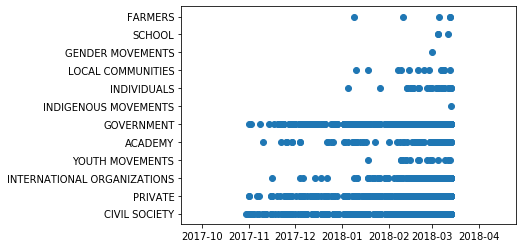

In [28]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Type of institution'],)
plt.show()

dico_institution = {'FARMERS':0,
                    'SCHOOL':1,
                    'GENDER MOVEMENTS': 2,
                    'LOCAL COMMUNITIES': 3,
                    'INDIVIDUALS':4,
                    'INDIGENOUS MOVEMENTS':5,
                    'GOVERNMENT':6,
                    'ACADEMY':7,
                    'YOUTH MOVEMENTS':8,
                    'INTERNATIONAL ORGANIZATIONS':9,
                    'PRIVATE':10,
                    'CIVIL SOCIETY':11
                   }

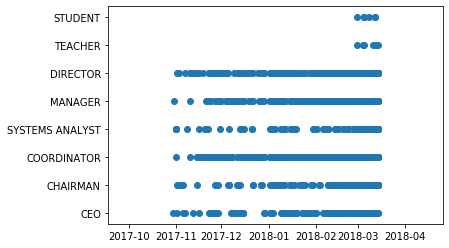

In [29]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Position'],)
plt.show()

dico_position = {'STUDENT':0,
                 'TEACHER':1,
                 'DIRECTOR':2,
                 'MANAGER':3,
                 'SYSTEMS ANALYST':4,
                 'COORDINATOR':5,
                 'CHAIRMAN':6,
                 'CEO':7
                }

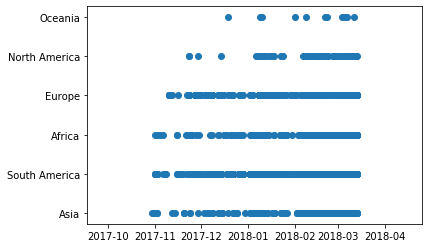

In [30]:
import matplotlib.pyplot as plt
plt.scatter(tableau['Purchase date'],tableau['Continent'],)
plt.show()

dico_continent = {'Oceania':0,
                  'North America':1,
                  'Europe':2,
                  'Africa':3,
                  'South America':4,
                  'Asia':5
                 }

In [31]:
# Définit une fonction générique en utilisant la fonction replace de Pandas
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded
tableau.head()

,Position,Type of institution,Country,Purchase date,Continent
0,CEO,CIVIL SOCIETY,Pakistan,2017-10-30,Asia
1,CHAIRMAN,CIVIL SOCIETY,Pakistan,2017-12-06,Asia
2,COORDINATOR,CIVIL SOCIETY,Pakistan,2017-12-08,Asia
3,CHAIRMAN,CIVIL SOCIETY,Pakistan,2017-12-12,Asia
4,CHAIRMAN,CIVIL SOCIETY,Pakistan,2017-12-13,Asia


In [32]:
# Transformation pour les institutions :

print('Avant codage:')
print(pd.value_counts(tableau["Type of institution"]))
tableau["Type of institution"] = coding(tableau["Type of institution"], dico_institution)
print('\nAprès codage:')
print(pd.value_counts(tableau["Type of institution"]))

Avant codage:
GOVERNMENT                     1329
CIVIL SOCIETY                   700
PRIVATE                         629
INTERNATIONAL ORGANIZATIONS     204
ACADEMY                          90
INDIVIDUALS                      29
YOUTH MOVEMENTS                  16
LOCAL COMMUNITIES                13
FARMERS                           5
SCHOOL                            3
GENDER MOVEMENTS                  1
INDIGENOUS MOVEMENTS              1
Name: Type of institution, dtype: int64

Après codage:
6     1329
11     700
10     629
9      204
7       90
4       29
8       16
3       13
0        5
1        3
5        1
2        1
Name: Type of institution, dtype: int64


In [33]:
# Transformation pour les positions :

print('Avant codage:')
print(pd.value_counts(tableau["Position"]))
tableau["Position"] = coding(tableau["Position"], dico_position)
print('\nAprès codage:')
print(pd.value_counts(tableau["Position"]))

Avant codage:
DIRECTOR           945
COORDINATOR        752
MANAGER            623
SYSTEMS ANALYST    265
CHAIRMAN           240
CEO                182
STUDENT              7
TEACHER              6
Name: Position, dtype: int64

Après codage:
2    945
5    752
3    623
4    265
6    240
7    182
0      7
1      6
Name: Position, dtype: int64


In [34]:
# Transformation pour les continents :

print('Continent')
print(pd.value_counts(tableau['Continent']))
tableau['Continent'] = coding(tableau['Continent'], dico_continent)
print('\nAprès codage:')
print(pd.value_counts(tableau['Continent']))

Continent
South America    1874
Europe            404
Africa            332
Asia              290
North America     108
Oceania            12
Name: Continent, dtype: int64

Après codage:
4    1874
2     404
3     332
5     290
1     108
0      12
Name: Continent, dtype: int64


In [35]:
tableau.head()

,Position,Type of institution,Country,Purchase date,Continent
0,7,11,Pakistan,2017-10-30,5
1,6,11,Pakistan,2017-12-06,5
2,5,11,Pakistan,2017-12-08,5
3,6,11,Pakistan,2017-12-12,5
4,6,11,Pakistan,2017-12-13,5


In [36]:
import time
from datetime import datetime
for i in range(len(tableau)):
    date = tableau.iloc[i,3]
    tableau.iloc[i,3] = int(round(date.timestamp() * 1000))

In [37]:
tableau.head(-5)

,Position,Type of institution,Country,Purchase date,Continent
0,7,11,Pakistan,1509321600000,5
1,6,11,Pakistan,1512518400000,5
2,5,11,Pakistan,1512691200000,5
3,6,11,Pakistan,1513036800000,5
4,6,11,Pakistan,1513123200000,5
...,...,...,...,...,...
3027,6,9,Mauritania,1520899200000,3
3028,2,9,Mauritania,1520899200000,3
3029,2,9,Mauritania,1520899200000,3
3030,3,9,Mauritania,1520899200000,3


# IA 

Utilisation d'un random forest pour predire à partir du continent, de la position et du type d'institution le jour d'achat du ticket pour le forum.

In [38]:
#Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Creation des labels et des features
X = tableau[['Position','Type of institution', 'Continent']]
y= tableau['Purchase date']
#Set seed for reproducibility
SEED  = 1

#Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

In [39]:
# Instantiate a ramdon forests regressor 'rf' 400 estimators

rf = RandomForestRegressor(n_estimators=400, random_state=SEED)



In [493]:
# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'ypred'
y_pred=rf.predict(X_test)


In [494]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE (milliseconds) of rf: {:.2f}'.format(rmse_test))

Test set RMSE (milliseconds) of rf: 2335146420.61


# Erreur sur le jour

In [497]:
erreur_jour = rmse_test/1000/60/60/24

print('Erreur Quadratique moyenne sur le jour (en jour) : \n')
print(int(erreur_jour))

Erreur Quadratique moyenne sur le jour (en jour) : 

27


# Importance des caractéristiques

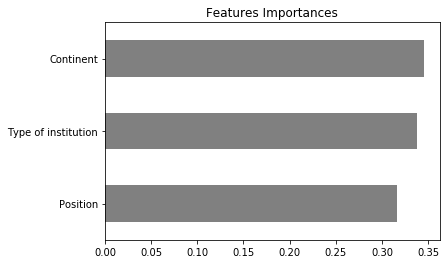

In [498]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='grey')
plt.title('Features Importances')
plt.show()